   # これはweek5のテキストです。
   ## 前半の予測モデルを作るところまではweek3のテキストと全く一緒です。


今回は東京中古マンションのデータを利用します。「housing_tokyo_chuo_line_week3.csv」のデータが与えられているとして、まずはTableauで可視化をしてみましょう。
___

**§ワーク１：　マンションの価格に強く影響を与えている説明変数（特徴量）は何ですか？**  
___



In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1579748707019' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TokyoChuoLineHousingPrice&#47;TokyoChuoLineHouingPrice&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TokyoChuoLineHousingPrice&#47;TokyoChuoLineHouingPrice' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TokyoChuoLineHousingPrice&#47;TokyoChuoLineHouingPrice&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1579748707019');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.5)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### scikit-learnで重回帰分析の実装
#### scikit-learnとは

scikit-learnとは、非常に便利なPythonの機械学習パッケージとなります。少ない行数、わかりやすいコードで機械学習を実装することができるため多くのユーザーに支持されています。Pythonの機械学習パッケージでは、デファクトスタンダードとなっております。

#### データの準備
pandasのところでも扱った、東京中古マンションのデータを読み込みましょう。

In [1]:
#pandasをインポートします。

import pandas as pd

In [6]:
#ファイルがあるか確認しましょう。
#ls 

In [2]:
# データをインポートします。
data = pd.read_csv("housing_tokyo_chuo_line_week3.csv")

In [2]:
#data.head()

In [5]:
## uidは予測に必要がないので削除しましょう。
#df = data.iloc[:,1:]
#df.head()
## df = data.drop(['uid'],axis=1) #これでも行ける

In [10]:
# 相関行列を書いてみよう　
#おまじない
#!pip install seaborn
#!pip install matplotlib


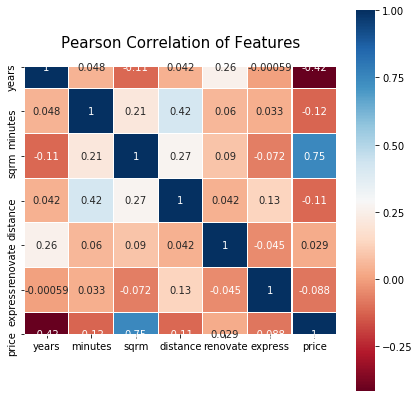

In [4]:
# 相関行列を書いてみよう　→　ここはこのまま実行しましょう！
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

___

**§ワーク2：　相関行列を見て、マンションの価格に強く影響を与えている説明変数（特徴量）は何だと思いますか？Tableau による散布図と比べてどんなことがわかりますか？　ディスカッションしてみてください。**  
___

## 予測モデルを作る

教師アリ学習での予測モデル作成の流れは以下のようになります。
![教師アリ](images/教師アリ学習.png)

予測モデルを作るために初めにすることは、「説明変数 x」と「目的変数 t」を分けることです。
まずは、入力変数`x`と出力変数`t`に分けておきましょう。分割には`iloc[]`を用います。

In [7]:
#データフレーム df には何が入っているか確認します。　→　何が目的変数ですか？

#df.head()

In [8]:
#priceは除く
#x = df.iloc[:, :-1] 

#priceだけ保持する
#t = df.iloc[:, -1] 

#### scikit-learnのimport
データの準備ができたのでscikit-learnをimportしましょう。scikit-learnは`sklearn`という名前でimportしますが、今回は`sklearn`の中の`linear_model`（線形モデル）の中の`LinearRegression`（線形回帰）をimportします。つまり、重回帰分析を実装するための機能をピンポイントでimportするイメージです。

In [9]:
# Linear Regression の　インポート
from sklearn.linear_model import LinearRegression

#### モデルの宣言

まずは、モデル（手法）の宣言を行います。先程importした`LinearRegression()`を`model`という変数に代入してあげます。厳密には「クラスのインスタンス化」というものにあたりますが、気になる方は調べてみてください。

In [11]:
# ①モデルの宣言
#model = LinearRegression()

#### モデルの学習

モデルの宣言後、**モデルの学習**を行います。モデルの学習とは、手持ちのデータを用いて適切なパラーメータを求めることです。

In [12]:
# ②モデルの学習
#model.fit(x, t)

#### モデルの評価

学習後のモデルを評価しましょう。モデルの評価には決定係数という指標を用います。  決定係数とは、モデルの当てはまりの良さを0から1までの値で表す指標になります。 1に近い方がより良いモデルを表しています。`score()`で評価することができます。評価するには、データも一緒に渡す必要があるため()内に、`x`と`t`を入れております。

In [13]:
# モデルの評価
#model.score(x, t)

0.79　という数値が出てきました。最大が1であることを考えると悪くはない数字かと思います。

> 補足：回帰と分類によって、`score()`を使用したときの評価指標が異なります。 分類は正解率（Accuracy）が評価指標になります。
> - 回帰：決定係数  
> - 分類：正解率（Accuracy）

決定係数とは？？



In [15]:
#③予測値をゲットしてみましょう。
#p = model.predict(x)

#データフレームに変換します。
#p = pd.DataFrame(p,columns=['predict'])

In [17]:
#オリジナルのデータと連結します。
#results = pd.concat([data,p],axis=1)
#results

In [20]:
#一度CSVに落としましょう。
results.to_csv("results.LinearRegression.csv")

一度Tableauに戻って評価してみましょう。
§ワーク　実績PRICEとPREDICTの差を誤差として、東京駅からの距離（つまり駅）ごとに誤差がどのように分布するか確認してください。そして誤差が多い駅はどこかディスカッションしてみてください。

In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1579753119257' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TokyoChuoLineHousingPrice&#47;sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TokyoChuoLineHousingPrice&#47;sheet2' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TokyoChuoLineHousingPrice&#47;sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1579753119257');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [22]:
# sklearn から mean_squared_error をインポートします。
from sklearn.metrics import mean_squared_error
import math

In [23]:
#RMSEを計算します。
mse = mean_squared_error(t, p)
print('RMSE:', math.sqrt(mse))

RMSE: 9954675.510173228


RMSEとは、Root Mean Square Error（二乗平均平方根誤差）の略で、回帰モデルの最も一般的な性能指標で以下の式で表現されます。
参考　https://aizine.ai/rmse-rmsle1114/#toc1
![RMSE](images/RMSE.png)

## 訓練データと検証データに分割

みなさん、前述のモデルの評価で実はやってはいけないことをしていました。なにかわかりますでしょうか。
それは、学習に用いたデータをそのままモデルの評価に使用している点です。モデルは学習に用いたデータにうまく当てはめようと計算するのですから、うまくあてはまるのはごく自然なことですよね。
理想は学習に使用するデータにうまくあてはまるだけではなく、新しいデータに対しても上手く当てはまることを確認する必要があります。

ここで出てくるのが**訓練データ**と**検証データ**になります。手持ちのデータを2つに分割し、モデルの学習に用いる訓練データとモデルの評価に用いる検証データに分割します。このようにすることで、新しいデータへの汎用性も確かめることができます。分割の割合はだいたい7:3で行うことが多いです。理想は5:5で半分を学習に用い、半分を評価に用いることです。しかし、現実は理想通りに分割できるほどのサンプル数がありませんので、学習に用いるデータに多くの割合を割くことになります。
このようにデータを訓練データと検証データに分割することを **ホールドアウト法** と呼びます。

また、ここで抑えておきたい話の中に**過学習（オーバーフィッティング）**というものがあります。これは、訓練データにうまく当てはまりすぎてしまい、新しいデータへの汎用性を失ってしまうことを意味します。例えるならば、定期試験前に過去問をひたすら勉強し、過去問では100点をたくさん取ることができるが、実際の試験では60点くらいしか取れないようなイメージです。過去のデータに**学習**し**過**ぎてしまう現象です。

上記のことを踏まえ、実際にホールドアウト法でもう一度実装してみましょう。
`sklearn`の中の`model_selection`の中に`train_test_split`がありますので、こちらをimportしましょう。



In [24]:
from sklearn.model_selection import train_test_split

それぞれ以下の変数名で定義します。
- `x`の訓練データ：`x_train`
- `t`の訓練データ：`t_train`
- `x`の検証データ：`x_val`
- `t`の検証データ：`t_val`

`val`は`validation`（検証）の略です。検証データの割合を全体の30%（0.3）とし、ランダムに分割します。下記のコードを実行するたびに異なるランダムでデータが分割されるのを防ぐために`random_state=3`を指定します。指定する数値は何でも構いませんが、同じ数値にしておくと同じ結果になりますので、今回は3にしておくことをオススメいたします。実行するたびに分割されるデータが変わらないように**再現性の確保**を行っております。各データの`shape`も確認しておきましょう。

![holdout](images/holdout.png)

In [19]:
#x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=3)

xxxxxxx = train_test_split(x, t, test_size=0.3, random_state=3)

#print('訓練データ : ', x_train.shape, t_train.shape)
#print('検証データ : ', x_val.shape, t_val.shape)

行数を確認すると、7:3の割合で分割できていることがわかるかと思います。
それでは、先程と同様にモデルの宣言から評価までを行いましょう。

In [26]:
# やってみましょう！
model = 

学習には訓練データを用います。

In [27]:
#　やってみましょう！
model.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

過学習が起きていないことを確認するために、モデルの評価は訓練データ、検証データの両方で行います。

In [20]:
#model.score(x_train, t_train)

In [21]:
#model.score(x_val, t_val)

訓練データと検証データへの決定係数の値がほぼ同じであるため、過学習が起きていないことがわかります。
これで評価までの一連の流れはできました。最後に予測値をもとめましょう。

#### RMSEでも評価してみましょう。

In [30]:
# ここはおまじないと思って実行してください。

from sklearn.metrics import mean_squared_error
import math

In [31]:
type(x_val)

pandas.core.frame.DataFrame

In [32]:
pd.DataFrame(x_val)

,years,minutes,sqrm,distance,renovate,express
1283,10,4,35,9.492734,0,1
250,46,8,30,6.580371,1,0
2153,25,18,55,31.925628,0,1
2239,45,19,60,17.027550,1,0
632,8,4,60,5.800329,0,0
...,...,...,...,...,...,...
2926,18,2,55,29.003514,0,0
577,19,6,55,4.152266,1,0
2191,16,16,70,31.925628,1,1
424,41,3,30,2.983801,0,0


In [33]:
#やってみましょう！

#検証データに対して予測値を得ます。
p_val = model.p
#訓練データに対して予測値を得ます。
p_train = model.

In [22]:
#p_val

In [35]:
#評価は検証データで行います。
mse = mean_squared_error(t_val, p_val)
print('RMSE:', math.sqrt(mse))

RMSE: 9362636.306389766


In [36]:
#訓練データについてはおまけです。
mse = mean_squared_error(t_train, p_train)
print('RMSE:', math.sqrt(mse))

RMSE: 10205189.819081264


# week3はここまでででした・・・
簡単に終わってしまう方はweek3のおまけで紹介したXGBoostなど他のモデルも使ってみましょう。

# week5はここからです！
### STEP1. 国土交通省の中古マンション取引履歴から頑張ってデータ準備した訓練データで予測モデルを作成しました。
### STEP2. 教師データに含まれているはずもない、Web上の不動産物件情報に対して、価格の予測を行い、実際と比較してみましょう。
#### お買い得物件が見つかるかもしれません。

In [37]:
#jupyter notebook が開いているところにあるファイルを確認
!dir #windows
!ls #mac

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 2CB0-A238 です

 C:\Users\USER\Documents\iwahashi\iwahashi\splineglobal\TableauDS学習塾\long2\week5\week5-contents のディレクトリ



ファイルが見つかりません
'ls' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


HOMES（不動産仲介業）のウェブサイト（　https://www.homes.co.jp/mansion/chuko/　）からスクレイピングし、
機械学習のモデルに投入できるように、諸々前準備したファイルをを利用します。（"HOMES_SCRAPING_ChuoLine_lat_long-UTF8.csv"）
このファイルはHOMESのWEBに今（2020-02-08)掲載されている、物件の条件や画像リンク、緯度経度が含まれています。

※　今回は　Google ChromeプラグインのInstant Data Sraper（https://chrome.google.com/webstore/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah） を利用してある程度スクレイピングしたものをTableau Prep Builderで加工しました。


In [38]:
# データをインポートします。
data_scraping = pd.read_csv("HOMES_SCRAPING_ChuoLine_lat_long-UTF8.csv")

In [23]:
#中身を確認します。
#data_scraping.head()

In [40]:
#予測に必要な特徴量（説明変数はilocの列指定で、 2:8 です。）
#やってみましょう！
test_x = data_scraping.iloc[   ,    ]

In [41]:
#中身を確認します。
test_x.head()

,years,minutes,sqrm,distance,renovate,express
0,41,5,42.14,2.960148,1,0
1,47,12,47.99,31.925628,1,1
2,48,3,43.60,7.768448,1,0
3,51,6,61.05,23.604636,1,0
4,51,9,47.38,20.154785,1,0


In [42]:
# predict_price に予測結果を格納します。
# やってみましょう！

predict_price = model.predict(xxxxxx)

In [43]:
# 予測結果をDataFrame型に変換します。
df_predict_price = pd.DataFrame(predict_price, columns=['predict'])

In [44]:
#元々の情報に予測結果を追加します。concatを使います。
scraping_predict =  pd.concat([data_scraping,df_predict_price],axis=1)

In [24]:
#scraping_predict.head()

In [46]:
#csvに吐き出します。
scraping_predict.to_csv("Chuoline_Scraiping+Predict.csv")

Tableau Desktop から予測値を含む　"Chuoline_Scraiping+Predict.csv"　に接続し、予測値を使ったダッシュボードを作ってみましょう。
もし、不動産業の担当であれば、物件の条件から相場を予測することに利用できるかもしれません。
今回は既に価格のわかっているデータではありますから、相場（予測）と実際の差分から、「お買い得物件」を発見できるかもしれません。


このデータをもとにワークブックを作成し、Tableau Public に掲載したサンプルです。

In [47]:
%%HTML
<div class='tableauPlaceholder' id='viz1581142085782' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KD&#47;KD7QTP8FH&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;KD7QTP8FH' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KD&#47;KD7QTP8FH&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1581142085782');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1400px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 補足　GBDT (Gradient Boost Decision Tree）を試してみましょう。

In [48]:
!pip install xgboost

In [49]:
import xgboost as xgb
from sklearn.metrics import log_loss

In [50]:
#GBDTで扱える形に変更
dtrain = xgb.DMatrix(x_train, label=t_train)
dvalid = xgb.DMatrix(x_val, label=t_val)

In [51]:
params = {'objective':'reg:squarederror', 'silent':1 , 'random_state':71}
num_round =50

In [52]:
watchlist = [(dtrain,'train'),(dvalid,'eval')]

In [53]:
model = xgb.train(params, dtrain,num_round, evals=watchlist)

[0]	train-rmse:29345464.00000	eval-rmse:30107838.00000
[1]	train-rmse:21457544.00000	eval-rmse:22077260.00000
[2]	train-rmse:16003146.00000	eval-rmse:16502447.00000
[3]	train-rmse:12248599.00000	eval-rmse:12898969.00000
[4]	train-rmse:9725397.00000	eval-rmse:10586329.00000
[5]	train-rmse:8051797.00000	eval-rmse:9131700.00000
[6]	train-rmse:6949698.50000	eval-rmse:8131266.50000
[7]	train-rmse:6226293.00000	eval-rmse:7609303.00000
[8]	train-rmse:5746667.50000	eval-rmse:7268201.00000
[9]	train-rmse:5450014.00000	eval-rmse:7097845.50000
[10]	train-rmse:5195719.00000	eval-rmse:7010491.50000
[11]	train-rmse:4999173.00000	eval-rmse:6976026.50000
[12]	train-rmse:4857461.00000	eval-rmse:6952394.00000
[13]	train-rmse:4745307.50000	eval-rmse:6903715.50000
[14]	train-rmse:4646628.50000	eval-rmse:6885524.50000
[15]	train-rmse:4599365.00000	eval-rmse:6884738.00000
[16]	train-rmse:4517039.00000	eval-rmse:6839118.00000
[17]	train-rmse:4482251.00000	eval-rmse:6808832.00000
[18]	train-rmse:4442178.50000

In [55]:
#予測値をゲットします。
va_pred = model.predict(dvalid)
train_pred = model.predict(dtrain)

In [56]:
from sklearn.metrics import mean_squared_error
import math

In [57]:
# 検証データについてRMSEを確認します。
mse = mean_squared_error(t_val, va_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 6759427.434418186


In [59]:
#訓練データについてRMSEを確認します。
mse = mean_squared_error(t_train, train_pred)
print('RMSE:', math.sqrt(mse))

RMSE: 3525009.745799859


####  GBDTモデルでの予測値を利用してダッシュボードを作ってみましょう。